In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from IPython.display import SVG
from sklearn.externals import joblib
from ann_visualizer.visualize import ann_viz;
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from matplotlib import pyplot
from collections import Counter


C:\Users\Pappa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
X_train_resampled.shape[1]

30

In [52]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [53]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [54]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0)
y_val.shape

(56962, 1)

In [55]:
n_cols = X_train_resampled.shape[1]
n_cols

30

## 2. Find the best number of neurons through the recall value

In [63]:
from keras import backend as K
def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


best_score_sl = actual_score = 0 #single layer
best_i_sl = 0
for i in range(1,60,1):
    print('Entro in:', i)
    model = Sequential()
    model.add(Dense(i, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall])
    history = model.fit(X_train_resampled.values, y_train_resampled.values, 
                    validation_data=(X_val.values, y_val['Class'].values),
                    epochs=150, batch_size=10, verbose=False)
    actual_score = np.mean(history.history['val_recall'])
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

Entro in: 1
I:  1 Best_I:  1 Best_Score:  0.015151619742654792 Actual_Score:  0.015151619742654792
Entro in: 2
I:  2 Best_I:  2 Best_Score:  0.015191412348189347 Actual_Score:  0.015191412348189347
Entro in: 3
I:  3 Best_I:  2 Best_Score:  0.015191412348189347 Actual_Score:  0.015165664191666988
Entro in: 4
I:  4 Best_I:  2 Best_Score:  0.015191412348189347 Actual_Score:  0.014898819660435313
Entro in: 5
I:  5 Best_I:  2 Best_Score:  0.015191412348189347 Actual_Score:  0.015013515994034894
Entro in: 6
I:  6 Best_I:  6 Best_Score:  0.015461767991674072 Actual_Score:  0.015461767991674072
Entro in: 7
I:  7 Best_I:  6 Best_Score:  0.015461767991674072 Actual_Score:  0.015281530896017583
Entro in: 8
I:  8 Best_I:  6 Best_Score:  0.015461767991674072 Actual_Score:  0.015128212327634468
Entro in: 9
I:  9 Best_I:  6 Best_Score:  0.015461767991674072 Actual_Score:  0.015225353099968808
Entro in: 10
I:  10 Best_I:  6 Best_Score:  0.015461767991674072 Actual_Score:  0.015114167878622275
Entro in

## 3. Neural Network with number of neurons equal to 21

In [150]:
clf = Sequential([
    Dense(21, kernel_initializer='uniform', input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.fit(X_train_resampled, y_train_resampled['Class'].values, batch_size=15, epochs=350) 
clf.summary()

Epoch 1/350
1848/1848 [==============================] - 5s 3ms/step - loss: 0.5657 - acc: 0.9432
Epoch 2/350
1848/1848 [==============================] - 0s 223us/step - loss: 0.2307 - acc: 0.9735
Epoch 3/350
1848/1848 [==============================] - 0s 216us/step - loss: 0.1108 - acc: 0.9746
Epoch 4/350
1848/1848 [==============================] - 0s 230us/step - loss: 0.0825 - acc: 0.9751
Epoch 5/350
1848/1848 [==============================] - 0s 233us/step - loss: 0.0716 - acc: 0.9767
Epoch 6/350
1848/1848 [==============================] - 0s 232us/step - loss: 0.0658 - acc: 0.9789
Epoch 7/350
1848/1848 [==============================] - 0s 217us/step - loss: 0.0622 - acc: 0.9805
Epoch 8/350
1848/1848 [==============================] - 0s 218us/step - loss: 0.0591 - acc: 0.9811
Epoch 9/350
1848/1848 [==============================] - 0s 241us/step - loss: 0.0569 - acc: 0.9827
Epoch 10/350
1848/1848 [==============================] - 0s 231us/step - loss: 0.0550 - acc: 0.9821
E

1848/1848 [==============================] - 0s 226us/step - loss: 0.0017 - acc: 1.0000
Epoch 163/350
1848/1848 [==============================] - 0s 212us/step - loss: 0.0016 - acc: 1.0000
Epoch 164/350
1848/1848 [==============================] - 0s 208us/step - loss: 0.0015 - acc: 1.0000
Epoch 165/350
1848/1848 [==============================] - 0s 208us/step - loss: 0.0015 - acc: 1.0000
Epoch 166/350
1848/1848 [==============================] - 0s 213us/step - loss: 0.0015 - acc: 1.0000
Epoch 167/350
1848/1848 [==============================] - 0s 248us/step - loss: 0.0015 - acc: 1.0000
Epoch 168/350
1848/1848 [==============================] - 0s 248us/step - loss: 0.0013 - acc: 1.0000
Epoch 169/350
1848/1848 [==============================] - 0s 257us/step - loss: 0.0014 - acc: 1.0000
Epoch 170/350
1848/1848 [==============================] - 0s 248us/step - loss: 0.0014 - acc: 1.0000
Epoch 171/350
1848/1848 [==============================] - 0s 226us/step - loss: 0.0013 - acc: 1

1848/1848 [==============================] - 0s 238us/step - loss: 9.6933e-06 - acc: 1.0000
Epoch 317/350
1848/1848 [==============================] - 0s 235us/step - loss: 8.3066e-06 - acc: 1.0000
Epoch 318/350
1848/1848 [==============================] - 0s 245us/step - loss: 9.2663e-06 - acc: 1.0000
Epoch 319/350
1848/1848 [==============================] - 0s 220us/step - loss: 8.8585e-06 - acc: 1.0000
Epoch 320/350
1848/1848 [==============================] - 0s 212us/step - loss: 2.3857e-04 - acc: 1.0000
Epoch 321/350
1848/1848 [==============================] - 0s 196us/step - loss: 1.0062e-04 - acc: 1.0000
Epoch 322/350
1848/1848 [==============================] - 0s 191us/step - loss: 1.9663e-05 - acc: 1.0000
Epoch 323/350
1848/1848 [==============================] - 0s 206us/step - loss: 1.2168e-05 - acc: 1.0000
Epoch 324/350
1848/1848 [==============================] - 0s 194us/step - loss: 9.5027e-06 - acc: 1.0000
Epoch 325/350
1848/1848 [==============================] - 0

In [151]:
score = clf.evaluate(X_val, y_val, batch_size=128)
print('\nAnd the Score is ', score[1] * 100, '%')

56962/56962 [==============================] - 3s 58us/step

And the Score is  98.74828833257259 %


In [152]:
y_pred = clf.predict(X_val)

In [153]:
rounded = [round(x[0]) for x in y_pred]

In [154]:
sum(rounded)

788.0

## 4. Confusion Matrix

In [155]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

In [156]:
from sklearn.metrics import classification_report

Confusion matrix, without normalization
[[56163   702]
 [   11    86]]


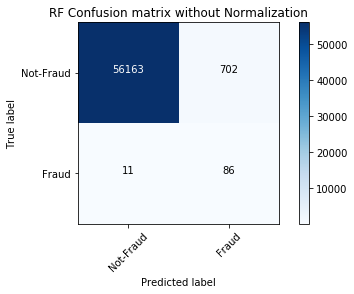

Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


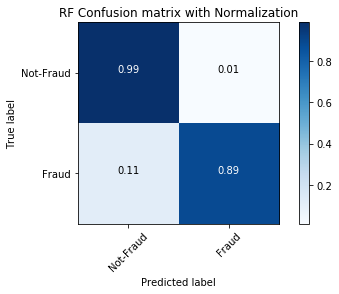

In [157]:
cm = confusion_matrix(y_val['Class'].values, rounded)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()

## 5. Metrics Scores

In [158]:
target_names = ['Not Fraud 0', 'Fraud 1']
print(classification_report(y_val, rounded, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      0.99     56865
     Fraud 1       0.11      0.89      0.19        97

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [159]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9876549723028225
Specificity :  0.8865979381443299


In [161]:

acc= accuracy_score( y_val['Class'].values, rounded)
recall = recall_score( y_val['Class'].values, rounded, average='binary')
precision = precision_score( y_val['Class'].values, rounded)
f1 = f1_score( y_val['Class'].values, rounded, average='binary')
average = average_precision_score( y_val['Class'].values, rounded)
kappa = cohen_kappa_score( y_val['Class'].values, rounded)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9874828833257259
Recall score 0.8865979381443299
Precision 0.10913705583756345
f1_score 0.19435028248587569
Average precision-recall score: 0.10
Kappa Score 0.19189972609209294


In [167]:
_, train_acc = clf.evaluate(X_train_resampled, y_train_resampled, verbose=0)
_, val_acc = clf.evaluate(X_val, y_val, verbose=0)

In [182]:
history.history

{'acc': [0.933441552410136,
  0.9734848444208954,
  0.9756493458113114,
  0.9783549751296188,
  0.9794372262763771,
  0.9810606021901745,
  0.9826839792005944,
  0.9826839795231304,
  0.9826839793296087,
  0.984848481881154,
  0.9843073558884782,
  0.985389607551294,
  0.985389607551294,
  0.985389607228758,
  0.9870129848842497,
  0.9880952359019936,
  0.9870129845617137,
  0.9891774865972015,
  0.9913419894067756,
  0.9902597379374813,
  0.9908008636076213,
  0.9908008636076213,
  0.9918831149479012,
  0.9913419892777612,
  0.9918831149479012,
  0.993506491958321,
  0.9918831152704372,
  0.9951298689687407,
  0.993506491958321,
  0.9956709946388806,
  0.9951298689687407,
  0.9951298689687407,
  0.9956709946388806,
  0.9951298689687407,
  0.9962121203090205,
  0.9956709946388806,
  0.9962121203090205,
  0.9967532459791605,
  0.9967532459791605,
  0.9972943716493003,
  0.9972943716493003,
  0.9962121203090205,
  0.9972943716493003,
  0.9972943716493003,
  0.9972943716493003,
  0.997835

Train: 1.000, Test: 0.987


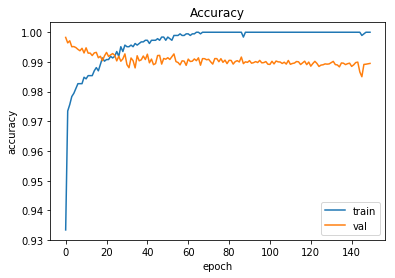

In [176]:

print('Train: %.3f, Test: %.3f' % (train_acc, val_acc))
# plot loss during training
#fig = pyplot.subplot(211)
#pyplot.title('Loss')
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='val')
#pyplot.legend()
# plot accuracy during training
#pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='val')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

Train: 1.000, Test: 0.987


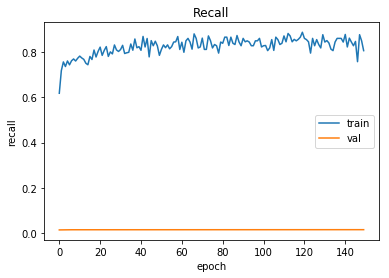

In [179]:

print('Train: %.3f, Test: %.3f' % (train_acc, val_acc))
# plot loss during training
#fig = pyplot.subplot(211)
#pyplot.title('Loss')
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='val')
#pyplot.legend()
# plot accuracy during training
#pyplot.subplot(212)
pyplot.title('Recall')
pyplot.plot(history.history['recall'], label='train')
pyplot.plot(history.history['val_recall'], label='val')
pyplot.xlabel('epoch')
pyplot.ylabel('recall')
pyplot.legend()
pyplot.show()

In [175]:
ann_viz(clf, title="Artificial Neural network with all features")

Text(0.5,1,'Precision-Recall curve: AP=0.08')

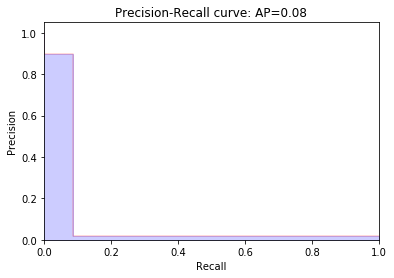

In [122]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve(rounded, y_val['Class'].values)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

In [123]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve' , linewidth = 2, color= 'darkorange')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2, color ='navy', linestyle='--')
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

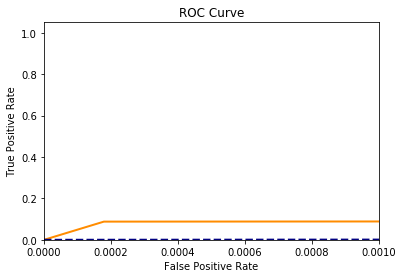

In [124]:
fpr, tpr, t = roc_curve(rounded, y_val['Class'].values)
plot_roc()

## 6. Save Model

In [128]:
joblib.dump(clf, 'Neural Network all Features.pkl') 

['Neural Network all Features.pkl']